## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

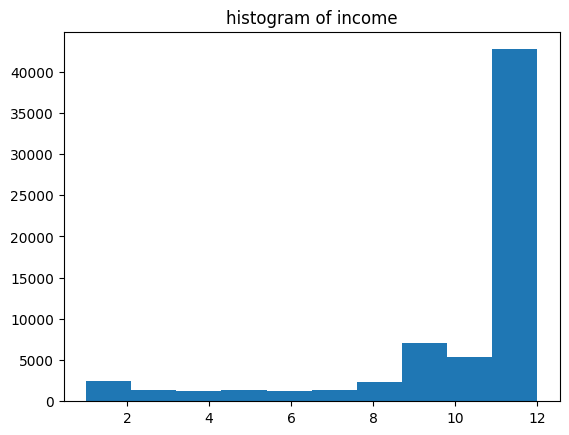

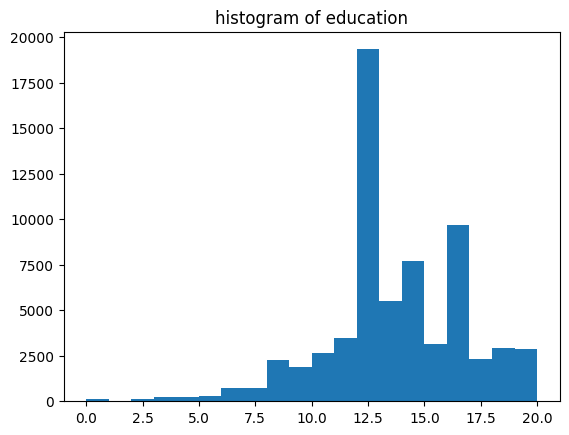

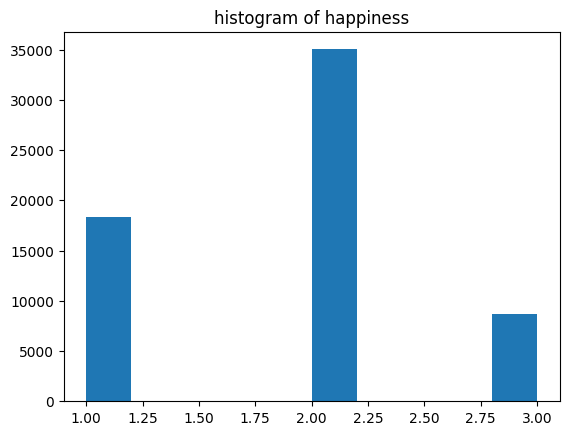

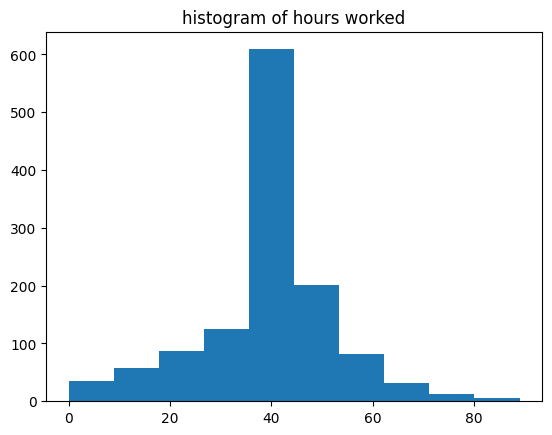

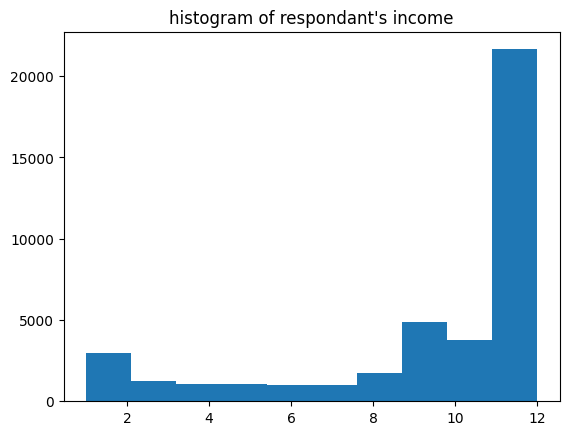

/tmp/ipython-input-90075540.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[~df['hapmar'].isin(unknowns)] #keeping subset that excluded unknowns and saved to seperate couples dataframe; same as rincome for comparison without missings.


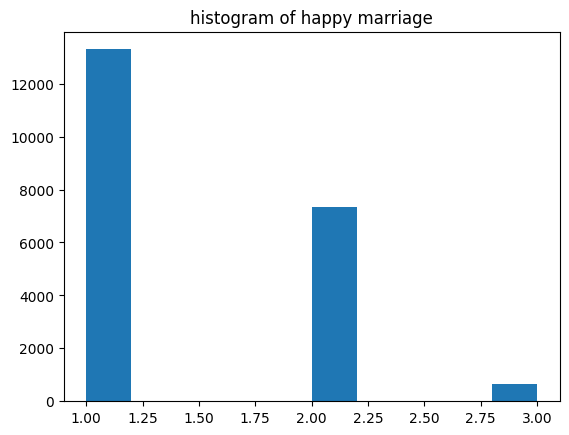

/tmp/ipython-input-90075540.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc2 = dfc[~df['hrs2'].isin(unknowns)] #seperate subset for hours worked and hapmar


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/data/GSS.xlsx') #read data from excel and save as dataframe

unknowns = [-100,-99,-98,-97,-90] #list of no value names

df['income'].value_counts() #checking unique values and distribution
df = df[~df['income'].isin(unknowns)] #keeping subset that excludes unknowns
df['income'].hist(grid=False) #distribution of income
plt.title('histogram of income')
plt.show()


df['educ'].value_counts() #checking unique values and distribution
df = df[~df['educ'].isin(unknowns)] #keeping subset that excludes unknowns
df['educ'].hist(bins = 20, grid=False) #distribution of education
plt.title('histogram of education')
plt.show()
#creating new column that groups education levels
dfed = df['educ']
condition = [(dfed<12),(dfed==12),(dfed>12) & (dfed<16),(dfed==16), (dfed>16)]
levels = ['Less than HS', 'HS', 'Some college', 'Bachelors', 'Beyond']
df['educ_level']=np.select(condition,levels,default = 'unknown')

df['happy'].value_counts() #checking unique values and distribution
df = df[~df['happy'].isin(unknowns)] #keeping subset that excludes unknowns
df['happy'].hist(grid = False) #distribution of happiness
plt.title('histogram of happiness')
plt.show()

df['hrs2'].value_counts() #checking unique values and distribution
df2 = df[~df['hrs2'].isin(unknowns)] #keeping subset of only those with inputs from databook excluding nulls and saved to new dataframe to conserve observations for other variables since this variable has a lot of missings.
df2['hrs2'].hist(grid=False) #distribution of hours worked
plt.title('histogram of hours worked')
plt.show()

df['rincome'].value_counts() #checking unique values and distribution
dfc = df[~df['rincome'].isin(unknowns)] #keeping subset that excluded unknowns and saved to seperate couples dataframe since there would are many missings for this variable
dfc['rincome'].hist(grid = False) #distribution of rincome
plt.title("histogram of respondant's income")
plt.show()

dfc['hapmar'].value_counts() #checking unique values and distribution
dfc = dfc[~df['hapmar'].isin(unknowns)] #keeping subset that excluded unknowns and saved to seperate couples dataframe; same as rincome for comparison without missings.
dfc['hapmar'].hist(grid = False) #distribution of rincome
plt.title("histogram of happy marriage")
plt.show()

dfc2 = dfc[~df['hrs2'].isin(unknowns)] #seperate subset for hours worked and hapmar



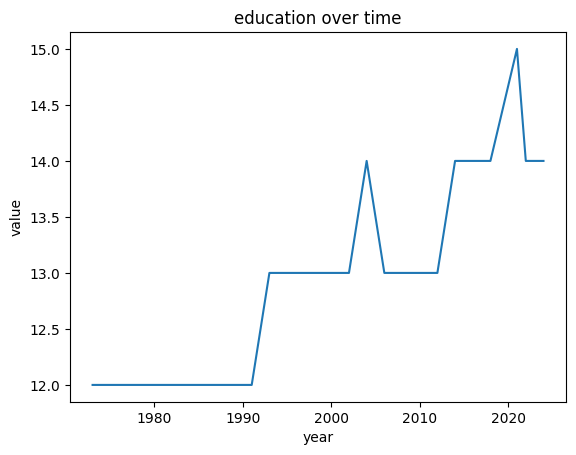

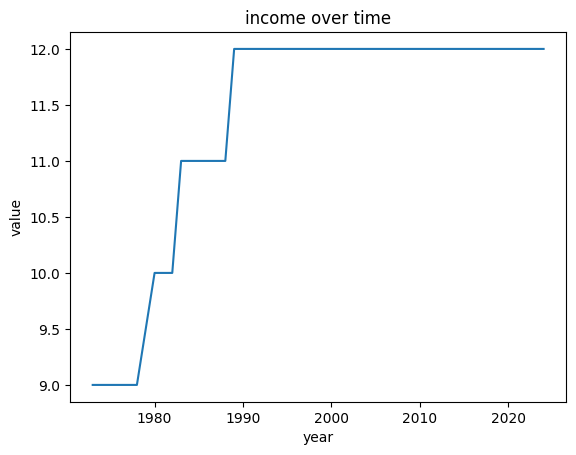

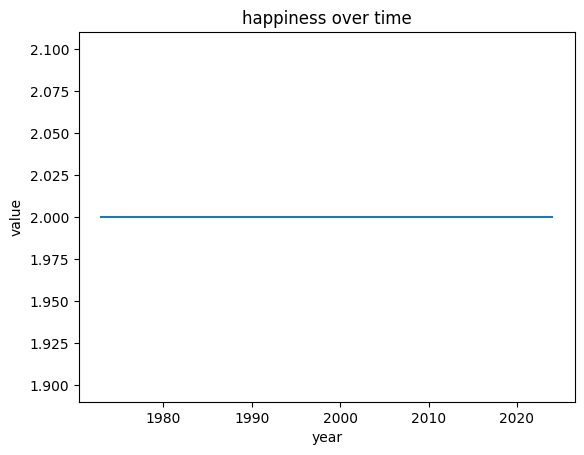

Correlations between income, education, and happiness: 
           income      educ     happy
income  1.000000  0.385122 -0.120347
educ    0.385122  1.000000 -0.070131
happy  -0.120347 -0.070131  1.000000


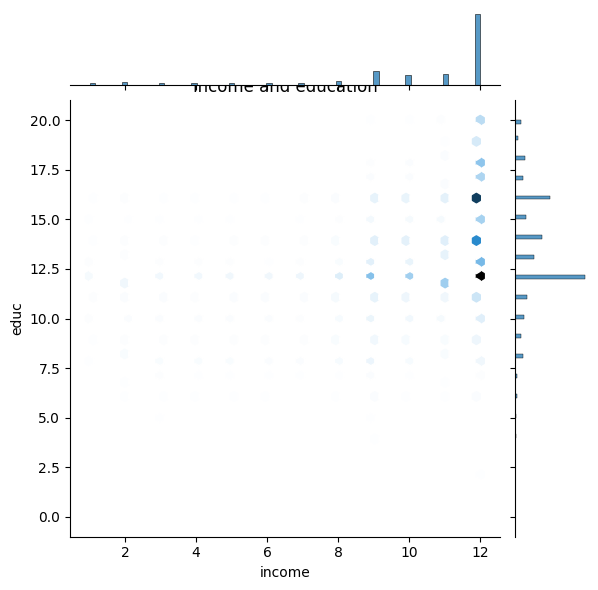

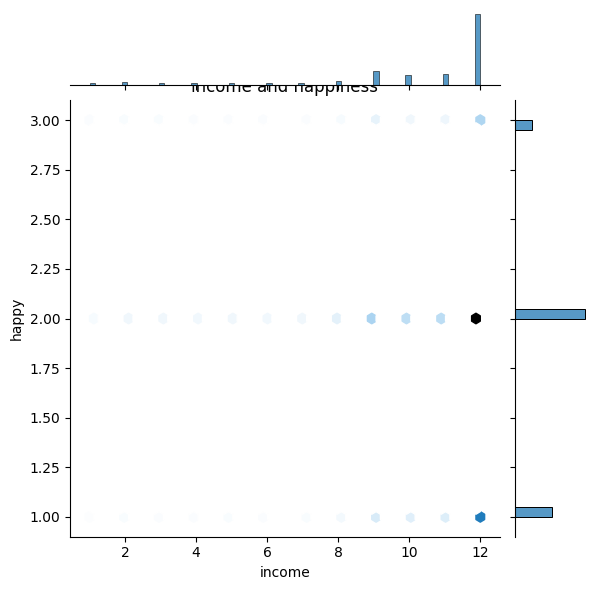

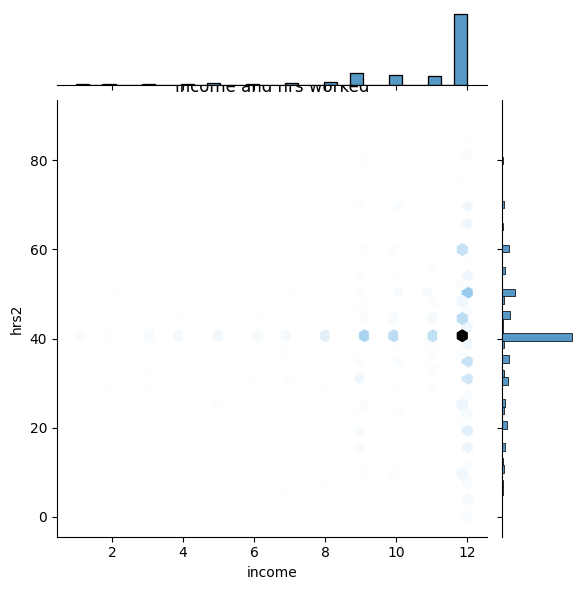

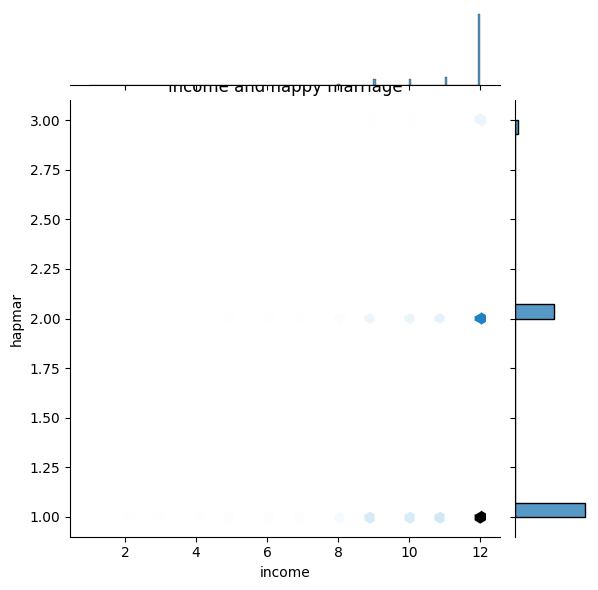

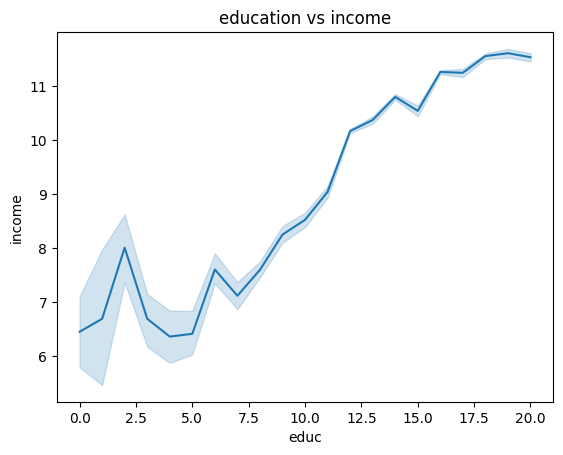

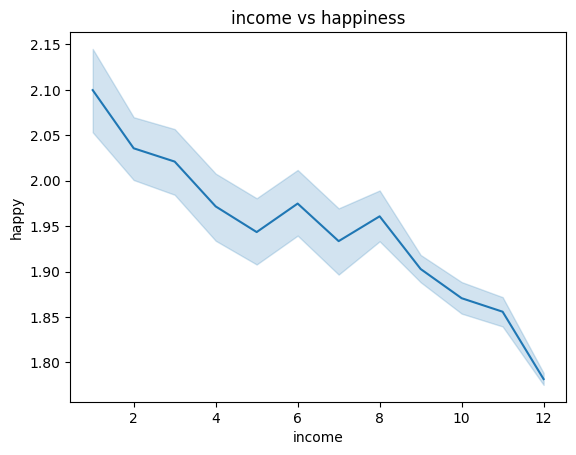

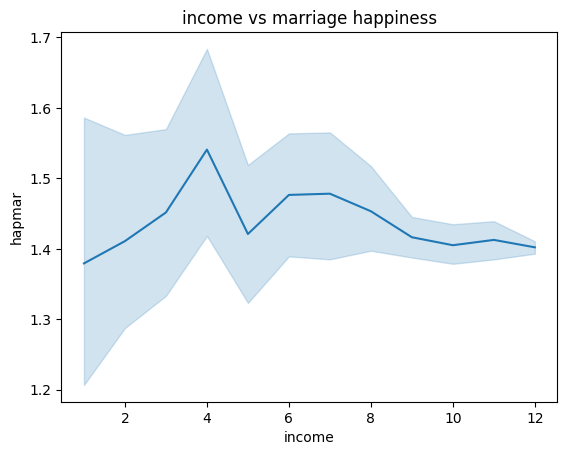

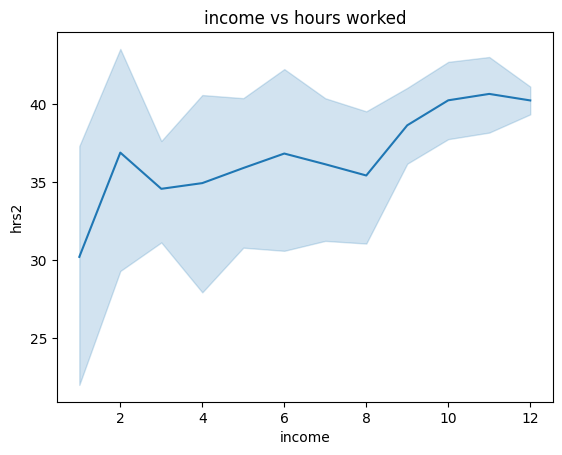

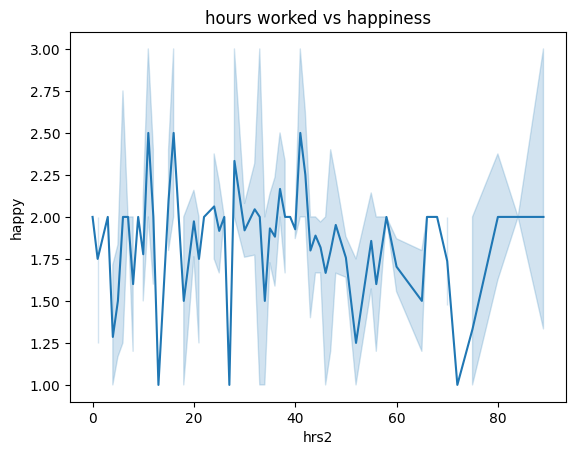

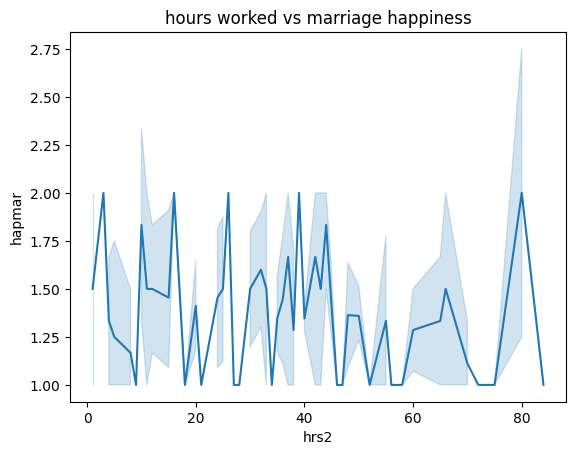

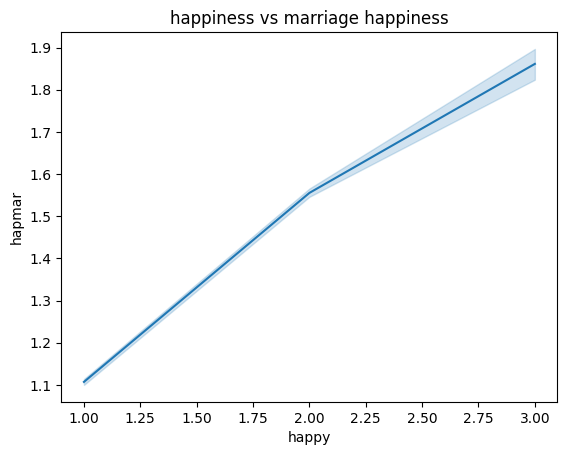

In [111]:
#4
#creating time series of data using medians of variable every year
dftm = df.drop(['id_', 'educ_level', 'hrs2', 'rincome', 'hapmar'], axis = 1)
dftm = pd.melt(dftm, id_vars = 'year')
dft = dftm.groupby(['year','variable']).median().reset_index()

educ = dft[dft['variable'] == 'educ']
income = dft[dft['variable'] == 'income']
happy = dft[dft['variable'] == 'happy']
sns.lineplot(x = 'year', y = 'value', data = educ)
plt.title('education over time')
plt.show()
sns.lineplot(x = 'year', y = 'value', data = income)
plt.title('income over time')
plt.show()
sns.lineplot(x = 'year', y = 'value', data = happy)
plt.title('happiness over time')
plt.show()

print('Correlations between income, education, and happiness:', '\n', df.loc[:,['income','educ','happy']].corr())
sns.jointplot(x = 'income', y = 'educ', data = df, kind = 'hex')
plt.title('income and education')
plt.show()

sns.jointplot(x = 'income', y = 'happy', data = df, kind = 'hex')
plt.title('income and happiness')
plt.show()

sns.jointplot(x = 'income', y = 'hrs2', data = df2, kind = 'hex')
plt.title('income and hrs worked')
plt.show()

sns.jointplot(x = 'income', y = 'hapmar', data = dfc, kind = 'hex')
plt.title('income and happy marriage')
plt.show()

sns.lineplot(data = df, x='educ', y = 'income')
plt.title("education vs income")
plt.show()

sns.lineplot(data = df, x='income', y = 'happy')
plt.title("income vs happiness")
plt.show()

sns.lineplot(data = dfc, x='income', y = 'hapmar')
plt.title("income vs marriage happiness")
plt.show()

sns.lineplot(data = df2, x='income', y = 'hrs2')
plt.title("income vs hours worked")
plt.show()

sns.lineplot(data = df2, x='hrs2', y = 'happy')
plt.title("hours worked vs happiness")
plt.show()

sns.lineplot(data = dfc2, x='hrs2', y = 'hapmar')
plt.title("hours worked vs marriage happiness")
plt.show()

sns.lineplot(data = dfc, x='happy', y = 'hapmar')
plt.title("happiness vs marriage happiness")
plt.show()


#5.
To get a feeling of the data and their distrbutions, each of the variables was plotted as a histogram.
The distribution of income is left skewed, with a great majority earning the highest value of 25,000+.
Education is more normal but still left skewed, with a peak around 12 years. Happiness is also more normal, with the highest count at 'pretty happy', followed by 'not too happy', with 'very happy' not far behind. Hours worked is also has a bell curve distributions with a peak and great majority at 40 hours per weak. Respondents income is very similar to the household income varibale so it will not be used for further analysis. Lastly, marriages are mostly 'not very happy', followed by 'pretty happy', with the least amount as 'very happy.' It seems most people are not happy with their marriage.

Next some plots over time were created. Education and income both seem to be increasing over time. The highest median education achieved was high school when the survey began in the 70's and 80's, but has increased to a couple years of college now, but still less than 4 years. Income has increased rapidly between 1980 and 1990 with the median increasing from 10,000-15,000 to 25,000+. Income has since been stagnant at 25,000+, but this is limited by the survey not registering any values greater than this, which is well below the average income today of 60,000. Having the income scale be so low really limits the findings from this data. Lastly, happiness doesn't seem to have changed at all staying at a median of 'pretty happy.' Again this is very limited as there are only three options, so naturally the middle choice would be most popular.
The correlation matrix shows very poor correlation between every combination of income, education, and happpiness, with the greated being between income and education at only 0.38. The various joint plots show distributions of 2 varibles together but do not reveal very much that we didn't already know nor give any strong results. There is a hotspot at hs and bachelors levels earning 25,000+, but this really doesn't mean much as most respondents were in the highest category of earning. It can be said that below college educations seem to have more data earning lower incomes, but this is not very conclusive.  

The lineplots graph one variable against another to see any trends, though for all of them, true correlation is likely low as there is high error. Roughly, as education increases, income does too. Meanwhile, happiness decreases with income. There isn't much relation between hours worked and income with extreme amounts of error but very roughly there is an increased in income with the amount of hours worked. There is no evident relation between hours worked and happiness or marriage happiness. Lastly, there is a positive relation between happiness and marriage happiness showing that as individual happiness increases, happiness of marriage also increases.